In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from tabulate import tabulate 
from datetime import datetime, timedelta
import yfinance as yf
import numpy as np
from matplotlib import pyplot as plt

,Company,Symbol,Industry,Date,Shares (millions),Offer Price,1st Day Close,Current Price,Return %,Possible Lock-up Date,Lock-up Date,Percentage Change 1wk Before,Percentage Change 1wk After,Percentage Change 1mo Before
25,"Third Harmonic Bio, Inc.",THRD,Pharmaceuticals,2022-09-15,10.90,$17.00,$19.68,$6.21,-63.47,03/14/2023,Passed,-4.47,1.51,-6.02
21,"Nexalin Technology, Inc.",NXL,ELECTROMEDICAL & ELECTROTHERAPEUTIC APPARATUS,2022-09-16,2.32,$4.15,$2.25,$0.42,-89.88,03/15/2023,Passed,-4.44,10.11,-17.02
14,"Know Labs, Inc.",KNW,Medical diagnostic technology - glucose monitor,2022-09-16,3.60,$2.00,$2.10,$0.51,-74.50,03/15/2023,Passed,0.0,6.98,-24.19
22,"Prime Medicine, Inc.",PRME,Biologic Substances,2022-10-20,10.29,$17.00,$15.37,$12.62,-25.76,04/18/2023,Passed,3.33,-3.96,3.33
4,ASP Isotopes Inc.,ASPI,Miscellaneous Chemical Products,2022-11-10,1.25,$4.00,$2.67,$0.99,-75.25,05/09/2023,Passed,-0.35,-15.77,-28.75
2,"Acrivon Therapeutics, Inc.",ACRV,Pharmaceutical Preparations,2022-11-15,7.55,$12.50,$16.64,$10.99,-12.08,05/14/2023,Passed,5.82,-9.01,60.50
8,Clearmind Medicine Inc.,CMND,Pharmaceuticals,2022-11-15,1.15,$6.50,$5.90,$0.40,-93.85,05/14/2023,Passed,9.49,1.65,7.67
15,Lipella Pharmaceuticals Inc.,LIPO,Pharmaceuticals,2022-12-20,1.22,$5.75,$4.71,$2.11,-63.30,06/18/2023,Passed,7.72,-6.57,17.74
9,"Coya Therapeutics, Inc.",COYA,PHARMACEUTICAL PREPARATIONS,2022-12-29,3.05,$5.00,$4.57,$4.69,-6.20,06/27/2023,Passed,-6.57,-6.61,2.25
7,"Cadrenal Therapeutics, Inc.",CVKD,Pharmaceutical Preparations,2023-01-20,1.40,$5.00,$4.12,$0.77,-84.60,07/19/2023,Passed,-37.78,-25.76,-11.39


DataFrame exported to C:\Users\blake\OneDrive\Documents\biodata.xlsx
Average Percentage Change 1mo: -4.081333333333333
Average Percentage Change 1wk Before: -4.056666666666667
Average Percentage Change 1wk After: -8.012666666666666
Average time to largest drop from IPO: 37.148148148148145 days


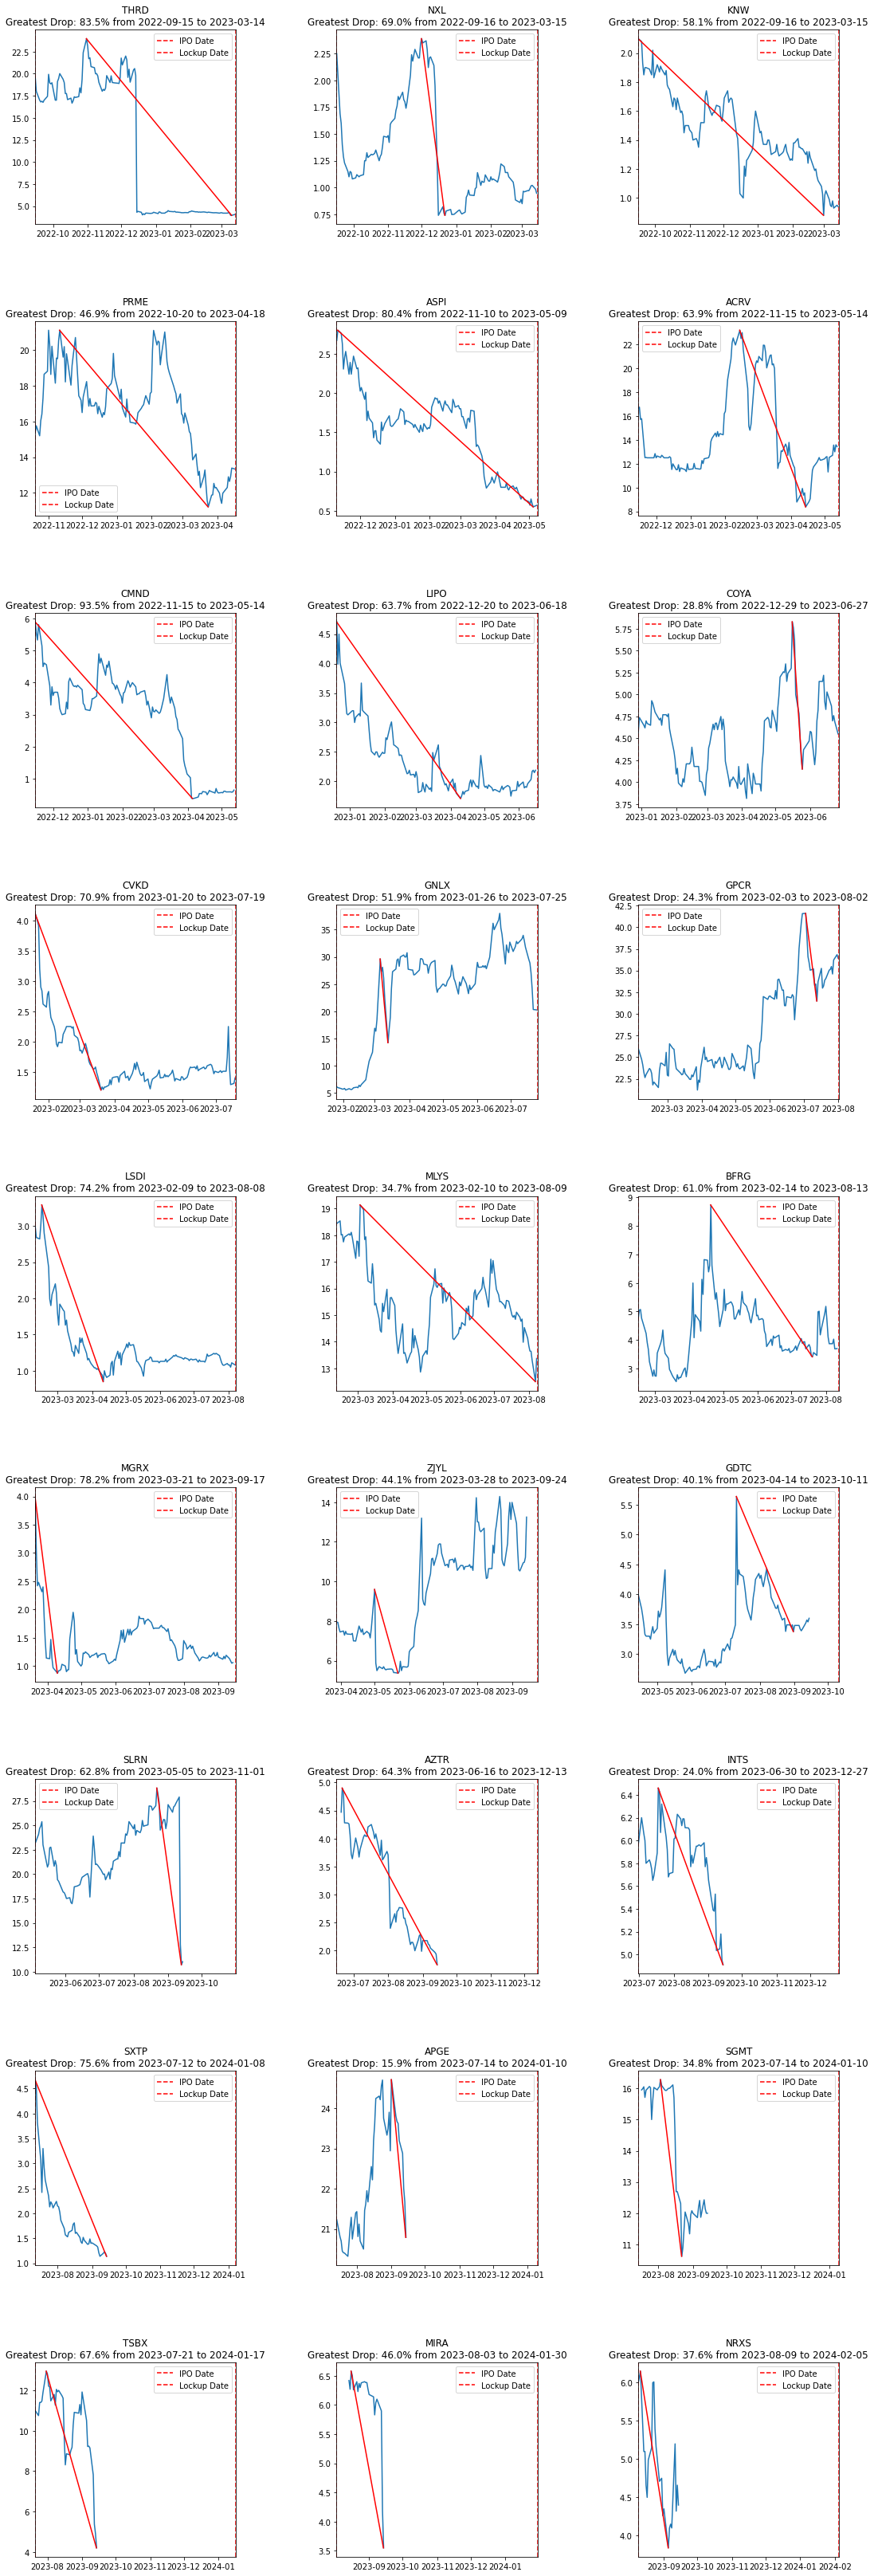

In [4]:
# Define the URL
url = "https://www.iposcoop.com/specific-industry/?industry=health_care"

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    html_content = response.text
else:
    print("Failed to retrieve the webpage.")
    exit()

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(html_content, 'html.parser')

# Find the table containing the data
table = soup.find('table', class_='standard-table ipolist')

# Extract column names
column_names = [header.text.strip() for header in table.find_all('th') if header.text.strip() != 'SCOOP Rating']

# Create a dictionary to store the data
data_dict = {col_name: [] for col_name in column_names}

# Extract rows of data
rows = table.find_all('tr')[1:]  # Skip the header row

# # Extract data from each row
# for row in rows:
#     cells = row.find_all('td')
#     price_cell = cells[column_names.index('Current Price')]  # Index of the "Current Price" column
#     price = float(price_cell.text.replace('$', '')) if price_cell.text.strip() != 'N/A' else 0.0
    
#     #filter out $3.00 or less stocks
#     if price >= 3.0:
#         for col_name, cell in zip(column_names, cells):
#             data_dict[col_name].append(cell.text.strip())

# Use this block if you want all stock prices instead of above block
# Extract data from each row
for row in rows:
    cells = row.find_all('td')
    for col_name, cell in zip(column_names, cells):
        data_dict[col_name].append(cell.text.strip())

# Create a Pandas DataFrame from the extracted data
df = pd.DataFrame(data_dict)
df = df.sort_values(by='Return %', ascending=False)
    
# Convert "Date" to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# Calculate "Possible Lock-up Date"
df['Possible Lock-up Date'] = df['Date'] + timedelta(days=180)

# Sort by "Possible Lock-up Date" in ascending order
df['Possible Lock-up Date'] = pd.to_datetime(df['Possible Lock-up Date'])
df = df.sort_values(by='Possible Lock-up Date', ascending=True)

# Add "Lock-up Date" column
today = datetime.today().date()
df['Lock-up Date'] = df['Possible Lock-up Date'].apply(lambda x: 'Passed' if x.date() < today else 'Upcoming')

# Format "Possible Lock-up Date"
df['Possible Lock-up Date'] = df['Possible Lock-up Date'].dt.strftime('%m/%d/%Y')

# Function to calculate percentage change
def calculate_percentage_change(stock_symbol, start_date, end_date):
    stock = yf.Ticker(stock_symbol)
    history = stock.history(start=start_date, end=end_date)
    
    if len(history) >= 2:
        start_price = history['Close'][0]
        end_price = history['Close'][-1]
        percentage_change = ((end_price - start_price) / start_price) * 100
        return percentage_change 
    else:
        return None


# Iterate through rows and calculate percentage changes
for index, row in df.iterrows():
    if row['Lock-up Date'] == 'Passed':
        stock_symbol = row['Symbol']
        lockup_date = pd.to_datetime(row['Possible Lock-up Date'])  # Convert to datetime
        
        # Calculate 1 week before and after the lockup date
        week_before = lockup_date - pd.DateOffset(weeks=1)
        week_after = lockup_date + pd.DateOffset(weeks=1)
        
        # Calculate percentage changes
        pct_change_1week_before = calculate_percentage_change(stock_symbol, week_before, lockup_date)
        pct_change_1week_after = calculate_percentage_change(stock_symbol, lockup_date, week_after)
        
        # Calculate percentage change for 1 month before the lockup date
        start_date_1mo = lockup_date - pd.DateOffset(months=1)
        pct_change_1mo = calculate_percentage_change(stock_symbol, start_date_1mo, lockup_date)
        
        # Initialize the columns if they are not already present in the DataFrame
        if 'Percentage Change 1wk Before' not in df.columns:
            df['Percentage Change 1wk Before'] = None
        
        if 'Percentage Change 1wk After' not in df.columns:
            df['Percentage Change 1wk After'] = None
        
        # Update DataFrame
        if pct_change_1mo is not None:
            df.at[index, 'Percentage Change 1mo Before'] = round(pct_change_1mo, 2)
        else:
            df.at[index, 'Percentage Change 1mo Before'] = 'N/A'
            
        if pct_change_1week_before is not None:
            df.at[index, 'Percentage Change 1wk Before'] = round(pct_change_1week_before, 2)
        else:
            df.at[index, 'Percentage Change 1wk Before'] = 'N/A'
            
        if pct_change_1week_after is not None:
            df.at[index, 'Percentage Change 1wk After'] = round(pct_change_1week_after, 2)
        else:
            df.at[index, 'Percentage Change 1wk After'] = 'N/A'
            
# Define the Excel file path
excel_file_path = r"C:\Users\blake\OneDrive\Documents\biodata.xlsx"  # Use the provided file path

# Display the updated DataFrame
with pd.option_context("display.max_rows", None):
    display(df)

# Export the DataFrame to an Excel file
df.to_excel(excel_file_path, index=False)
print(f"DataFrame exported to {excel_file_path}")

# Calculate and print the average of Percentage Change 1mo while omitting NaN values
average_percentage_change_1mo = df['Percentage Change 1mo Before'].mean(skipna=True)
print("Average Percentage Change 1mo:", average_percentage_change_1mo)

# Calculate and print the average of Percentage Change 1wk Before while omitting NaN values
average_percentage_change_1wk_before = df['Percentage Change 1wk Before'].mean(skipna=True)
print("Average Percentage Change 1wk Before:", average_percentage_change_1wk_before)

# Calculate and print the average of Percentage Change 1wk After while omitting NaN values
average_percentage_change_1wk_after = df['Percentage Change 1wk After'].mean(skipna=True)
print("Average Percentage Change 1wk After:", average_percentage_change_1wk_after)

def getStockData(stock_symbol, start_date, end_date):
    stock = yf.Ticker(stock_symbol)
    history = stock.history(start=start_date, end=end_date)
    return history

def getGreatestDrop(stock):
    min_value = None
    min_index = None
    greatest_drop = None
    greatest_drop_start = None
    greatest_drop_end = None

    for index in range(len(stock) - 1, -1, -1):
        if min_value is None or stock.iloc[index]['Close'] < min_value:
            min_value = stock.iloc[index]['Close']
            min_index = index

        drop = 1 - min_value / stock.iloc[index]['Close']

        if greatest_drop is None or drop > greatest_drop:
            greatest_drop = drop
            greatest_drop_start = index
            greatest_drop_end = min_index

    return greatest_drop, greatest_drop_start, greatest_drop_end

if __name__ == "__main__":
    
    # Calculate the number of rows and columns for subplots
    num_stocks = len(df)
    cols = 3
    rows = -(-num_stocks // cols)  # Ceiling division

    # Create subplots
    fig, axs = plt.subplots(rows, cols, figsize=(15, 5 * rows))
    
    # Define the list to store time to largest drop values
    time_to_drop = []

    # Iterate through rows and columns to plot stocks
    for r in range(rows):
        for c in range(cols):
            index = r * cols + c
            if index < num_stocks:
                # Get the stock symbol
                stock_symbol = df.iloc[index]['Symbol']

                # Get the IPO date and lockup date
                ipo_date = df.iloc[index]['Date']
                lockup_date = pd.to_datetime(df.iloc[index]['Possible Lock-up Date'])

                # Get stock data
                stock_data = getStockData(stock_symbol, ipo_date, lockup_date)

                # Plot stock data
                axs[r, c].plot(stock_data.index, stock_data['Close'])

                # Set the time zone of stock_data index to match ipo_date
                stock_data.index = stock_data.index.tz_localize(ipo_date.tz)

                # Calculate greatest drop
                drop, drop_start, drop_end = getGreatestDrop(stock_data)

                # Calculate time to largest drop
                time_to_largest_drop = (stock_data.index[drop_start] - ipo_date).days

                # Append to list
                time_to_drop.append(time_to_largest_drop)

                # Highlight greatest drop period
                axs[r, c].plot([stock_data.index[drop_start], stock_data.index[drop_end]],
                               [stock_data.iloc[drop_start]['Close'], stock_data.iloc[drop_end]['Close']], color="red")

                # Add vertical lines for IPO date and lockup date
                axs[r, c].axvline(x=ipo_date, color="red", linestyle="--", label="IPO Date")
                axs[r, c].axvline(x=lockup_date, color="red", linestyle="--", label="Lockup Date")

                # Set x-axis limits
                axs[r, c].set_xlim(ipo_date, lockup_date)

                # Set title
                axs[r, c].set_title(f"{stock_symbol}\nGreatest Drop: {100 * drop:.1f}% from {ipo_date.date()} to {lockup_date.date()}")

                # Add legend
                axs[r, c].legend()
  
    # Calculate average time to largest drop
    average_time_to_drop = np.mean(time_to_drop)
    print("Average time to largest drop from IPO:", average_time_to_drop, "days")

    # Adjust layout to prevent overlapping
    plt.tight_layout()
    
    # Adjust vertical spacing between subplots
    plt.subplots_adjust(hspace=0.5, wspace=0.5) 

    # Show all plots
    plt.show()



In [3]:
# Filter the DataFrame to include only 'Passed' stocks
passed_stocks_df = df[df['Lock-up Date'] == 'Passed']

# Create a dictionary to store the returns
ipo_to_lockup_avg = {}
returns_by_industry = {}

# Iterate through the passed stocks and calculate returns by industry
for index, row in passed_stocks_df.iterrows():
    stock_symbol = row['Symbol']
    ipo_date = row['Date']
    lockup_date = pd.to_datetime(row['Possible Lock-up Date'])
    
    # Get stock data
    stock_data = getStockData(stock_symbol, ipo_date, lockup_date)

    # Calculate the percentage return from IPO until Lock-up Date
    start_price = stock_data.iloc[0]['Close']
    end_price = stock_data.iloc[-1]['Close']
    percentage_return = ((end_price - start_price) / start_price) * 100

    # Get the industry for the current stock
    industry = row['Industry']

    # Add the return to the list for the current industry
    if industry in returns_by_industry:
        returns_by_industry[industry].append(percentage_return)
    else:
        returns_by_industry[industry] = [percentage_return]
        
    # Add the return to the list
    ipo_to_lockup_avg = [percentage_return]

# Calculate and print the average percentage returns by industry
print("Average Percentage Return:")
for returns in ipo_to_lockup_avg:
    average_return = np.mean(returns)
    print(f"{average_return:.2f}%") 

# Calculate and print the average percentage returns by industry
print("Average Percentage Returns by Industry:")
for industry, returns in returns_by_industry.items():
    average_return = np.mean(returns)
    print(f"{industry}: {average_return:.2f}%") 

Average Percentage Return:
-22.27%
Average Percentage Returns by Industry:
Pharmaceuticals: 1.92%
Medical diagnostic technology - glucose monitor: -55.24%
ELECTROMEDICAL & ELECTROTHERAPEUTIC APPARATUS: -57.96%
Biologic Substances: -13.27%
Miscellaneous Chemical Products: -78.65%
Pharmaceutical Preparations: -35.82%
PHARMACEUTICAL PREPARATIONS: -12.93%


In [4]:
# Function to retrieve stock price data from IPO until lockup date
def get_stock_price_data(stock_symbol, ipo_date, lockup_date):
    stock = yf.Ticker(stock_symbol)
    data = stock.history(start=ipo_date, end=lockup_date)
    return data

# Create an empty DataFrame to store analysis results
columns = [
    "Stock", "Max High", "Days Until Lockup",
    "Min Low", "Days Until Lockup", "Start Price",
    "End Price", "Percentage Change"
]
analysis_df = pd.DataFrame(columns=columns)

for index, row in df.iterrows():
    if row['Lock-up Date'] == 'Passed':
        stock_symbol = row['Symbol']
        ipo_date = pd.to_datetime(row['Date']).tz_localize('UTC')  # Convert and localize to UTC
        lockup_date = pd.to_datetime(row['Possible Lock-up Date']).tz_localize('UTC')  # Convert and localize to UTC
        
        stock_price_data = get_stock_price_data(stock_symbol, ipo_date, lockup_date)

        # Calculate metrics and store in analysis_df DataFrame
        max_high = stock_price_data['High'].max()
        max_high_date = stock_price_data['High'].idxmax()
        min_low = stock_price_data['Low'].min()
        min_low_date = stock_price_data['Low'].idxmin()
        start_price = stock_price_data.iloc[0]['Close']
        end_price = stock_price_data.iloc[-1]['Close']
        pct_change = ((end_price - start_price) / start_price) * 100
        days_until_lockup = (lockup_date - ipo_date).days
        
        days_until_high = (lockup_date - max_high_date).days
        days_until_low = (lockup_date - min_low_date).days
        
        analysis_df = pd.concat([
            analysis_df,
            pd.DataFrame([[
                stock_symbol,
                max_high,
                days_until_high,
                min_low,
                days_until_low,
                start_price,
                end_price,
                pct_change
            ]], columns=columns)
        ], ignore_index=True)

# Display the analysis results as a table using pandas
with pd.option_context("display.max_rows", None):
    # Format specific columns with dollar sign and percentage sign
    formatted_analysis_df = analysis_df.copy()
    formatted_analysis_df['Start Price'] = formatted_analysis_df['Start Price'].apply('${:.2f}'.format)
    formatted_analysis_df['End Price'] = formatted_analysis_df['End Price'].apply('${:.2f}'.format)
    formatted_analysis_df['Max High'] = formatted_analysis_df['Max High'].apply('${:.2f}'.format)
    formatted_analysis_df['Min Low'] = formatted_analysis_df['Min Low'].apply('${:.2f}'.format)

    formatted_analysis_df['Percentage Change'] = formatted_analysis_df['Percentage Change'].apply('{:.2f}%'.format)
    
    # Reset float formatting for other columns
    with pd.option_context("display.float_format", None):
        display(formatted_analysis_df)

,Stock,Max High,Days Until Lockup,Min Low,Days Until Lockup,Start Price,End Price,Percentage Change
0,THRD,$24.59,132,$3.75,0,$19.68,$4.06,-79.37%
1,KNW,$3.17,179,$0.80,12,$2.10,$0.94,-55.24%
2,NXL,$3.23,113,$0.65,76,$2.25,$0.95,-57.96%
3,PRME,$21.73,154,$11.07,24,$15.37,$13.33,-13.27%
4,ASPI,$3.75,179,$0.53,3,$2.67,$0.57,-78.65%
5,ACRV,$25.47,96,$8.06,29,$16.64,$13.45,-19.17%
6,CMND,$6.10,179,$0.37,37,$5.90,$0.65,-89.05%
7,LIPO,$7.72,179,$1.69,68,$4.71,$2.19,-53.50%
8,COYA,$8.00,41,$3.68,144,$4.57,$4.55,-0.44%
9,CVKD,$6.75,179,$1.20,120,$4.12,$1.40,-66.02%


In [5]:
# Create a list to store rows of data
upcoming_stocks_data = []

# Iterate through rows and add information for "Upcoming" stocks
for index, row in df.iterrows():
    if row['Lock-up Date'] == 'Upcoming':
        ticker = row['Symbol']
        company = row['Company']
        lockup_date = pd.to_datetime(row['Possible Lock-up Date'])
        
        # Convert today to a pd.Timestamp object
        today = pd.Timestamp(datetime.today().date())
        
        remaining_days = (lockup_date - today).days
        
        upcoming_stocks_data.append({
            'Ticker': ticker,
            'Company': company,
            'Days Until Lockup Date': remaining_days
        })

# Create a DataFrame from the list of data
upcoming_stocks_df = pd.DataFrame(upcoming_stocks_data)

# Display the DataFrame with upcoming stocks and days until lockup date
with pd.option_context("display.max_rows", None):
    display(upcoming_stocks_df)

,Ticker,Company,Days Until Lockup Date
0,MGRX,"Mangoceuticals, Inc.",3
1,ZJYL,Jin Medical International Ltd.,10
2,GDTC,CytoMed Therapeutics Limited,27
3,SLRN,"Acelyrin, Inc.",48
4,AZTR,Azitra Inc.,90
5,INTS,"Intensity Therapeutics, Inc.",104
6,SXTP,"60 Degrees Pharmaceuticals, Inc.",116
7,APGE,Apogee Therapeutics,118
8,SGMT,Sagimet Biosciences Inc.,118
9,TSBX,Turnstone Biologics Corp.,125
